# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [2]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [3]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[["city","country"]]


,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [4]:
# Q2: how to get the first 5 rows of the "city" column?
df["city"][0:5]

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [5]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2,:]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [6]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[0,["country"]]

country    United Kingdom
Name: 0, dtype: object

In [7]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[0:3,["city","date"]]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [8]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[2,1]

-0.446081

In [9]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[300::300]

,lat,lon,date,city,country
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [10]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [11]:
df.astype('object').describe()

,lat,lon,date,city,country
count,178.000000,178.000000,178,178,178
unique,178.000000,178.000000,177,91,15
top,51.481292,-0.451011,07/05/2014 00:52,Barcelona,Spain
freq,1.000000,1.000000,2,28,34


In [12]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df["city"].isin(["Munich"])

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [13]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
df1=df[(df["country"]=="Spain")&(df["city"]!="Barcelona")]
df1

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [14]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df["city"]=="Munich")|(df["country"]=="Serbia")]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [15]:
# Q12: how many observations are west of the prime meridian?
df[df["lon"]<0].count()

lat        24
lon        24
date       24
city       24
country    24
dtype: int64

NameError: name 'plot' is not defined

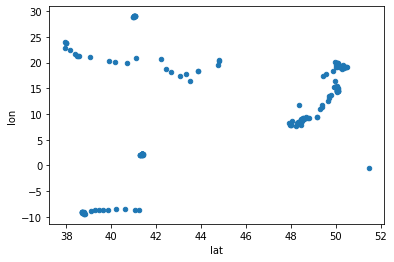

In [16]:
df.plot.scatter(x="lat",y="lon")
plot.show()

In [17]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.startswith('G')]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [18]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
df['city'].value_counts()

Barcelona                 28
Istanbul                  12
Prague                    10
Lisbon                     9
Dytiki Ellada              6
                          ..
Tarnowskie Góry County     1
Gliwice                    1
Ruda Slaska                1
Imielin                    1
Munich                     1
Name: city, Length: 91, dtype: int64

In [19]:
# Q15: group by country name and show the city names in each of the country
df.groupby('country')[["city"]].apply(lambda x:x[:])

city
country                                 
Albania                151         Berat
                       152   Gjirokastër
Bosnia and Herzegovina 142      Sarajevo
                       143      Sarajevo
                       144        Mostar
...                                  ...
Turkey                 173      Istanbul
                       174      Istanbul
                       175      Istanbul
                       176      Istanbul
United Kingdom         0    West Drayton

[178 rows x 1 columns]

## Part 3 <br /> How to select based on a date-time values

In [20]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [21]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

False

In [22]:
dt.duplicated()

date
2014-05-14 09:07:00    False
2014-05-14 09:22:00    False
2014-05-14 10:51:00    False
2014-05-14 11:24:00     True
2014-05-14 11:38:00    False
                       ...  
2014-07-09 13:13:00    False
2014-07-09 13:14:00    False
2014-07-09 13:17:00    False
2014-07-09 13:18:00    False
2014-07-09 13:20:00    False
Length: 1759, dtype: bool

In [23]:
# Q17: drop duplicate index 
dt[~dt.index.duplicated(keep='last')]

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom
...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany


In [24]:
# Q18: create a weekday and a weekend dataframe
dt01=dt[~dt.index.duplicated(keep='last')]
dt01['weeknum'] = dt01.index
dt01['weeknum'] = dt01['weeknum'].apply(lambda x: pd.Timestamp(x).weekday())
dt01

C:\Users\viran\AppData\Local\Temp/ipykernel_15772/720423923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt01['weeknum'] = dt01.index
C:\Users\viran\AppData\Local\Temp/ipykernel_15772/720423923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt01['weeknum'] = dt01['weeknum'].apply(lambda x: pd.Timestamp(x).weekday())


,lat,lon,city,country,weeknum
date,,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom,2
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom,2
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom,2
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom,2
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom,2
...,...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany,2
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany,2
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany,2


In [31]:
dt01['weeknum'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int64)

In [30]:
dt01[dt01["weeknum"]<=4]

,lat,lon,city,country,weeknum
date,,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom,2
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom,2
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom,2
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom,2
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom,2
...,...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany,2
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany,2
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany,2


In [33]:
dt01[dt01["weeknum"]>4]

,lat,lon,city,country,weeknum
date,,,,,
2014-05-17 00:09:00,38.711824,-9.137308,Lisbon,Portugal,5
2014-05-17 00:39:00,38.711833,-9.137317,Lisbon,Portugal,5
2014-05-17 01:09:00,38.711822,-9.137277,Lisbon,Portugal,5
2014-05-17 01:39:00,38.711823,-9.137273,Lisbon,Portugal,5
2014-05-17 01:54:00,38.711828,-9.137279,Lisbon,Portugal,5
...,...,...,...,...,...
2014-07-06 22:12:00,41.040212,28.988639,Istanbul,Turkey,6
2014-07-06 22:27:00,41.043491,28.985364,Istanbul,Turkey,6
2014-07-06 23:12:00,41.043476,28.985419,Istanbul,Turkey,6


In [36]:
# Q19: calculate and plot the number of observations each day of the week has
dt01.groupby('weeknum').count()


,lat,lon,city,country
weeknum,,,,
0,263,263,263,263
1,254,254,254,254
2,254,254,254,254
3,256,256,256,256
4,218,218,218,218
5,268,268,268,268
6,245,245,245,245
